In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Preparing Data

In [3]:
# read data
data = pd.read_excel(r'/content/drive/MyDrive/TA (1)/Processing Data/Data/raw data/data_after_cleansing.xlsx',sheet_name="Karawang")
data

,Date,Hours,Hs [m],Angin [m/s]
0,1999-01-12 00:00:00,1,0.281,3.450012
1,1999-01-12 01:00:00,2,0.281,3.195916
2,1999-01-12 02:00:00,3,0.281,3.480425
3,1999-01-12 03:00:00,4,0.234,3.734589
4,1999-01-12 04:00:00,5,0.234,3.478974
...,...,...,...,...
3643,1999-06-12 19:00:00,3644,0.297,4.675316
3644,1999-06-12 20:00:00,3645,0.297,4.597948
3645,1999-06-12 21:00:00,3646,0.250,4.480365
3646,1999-06-12 22:00:00,3647,0.250,4.327907


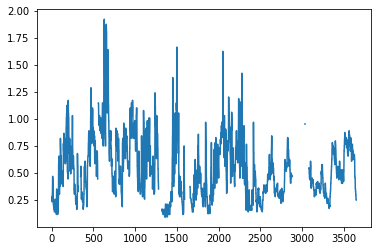

In [4]:
# plotting raw data
plt.plot(data['Hours'],data['Hs [m]'])
plt.show()

In [6]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure()
fig.add_trace(go.Scatter(x=data['Date'], y=data['Hs [m]'],
                    mode='lines')
)

# Edit the layout
fig.update_layout( xaxis_title='<b>Date</b>',
                   yaxis_title='<b><i>Hs</i> [m]</b>')


In [5]:
import copy
data_raw = copy.deepcopy(data)

### handling outliers

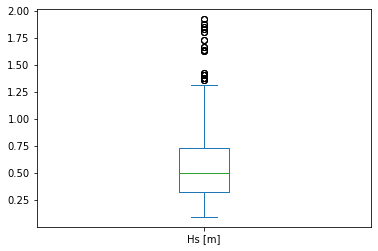

In [ ]:
data['Hs [m]'].plot(kind='box', sharex=False, sharey=False)
plt.show()

In [ ]:
# calculate q1, q3, iqr 
q1 = data['Hs [m]'].quantile(0.25)
q3 = data['Hs [m]'].quantile(0.75)
iqr = q3 - q1

In [ ]:
data['Hs [m]'].loc[(data['Hs [m]']> q3+(1.5*iqr)) & (data['Hs [m]']<= q3+(3*iqr)) ]

624     1.828
625     1.828
626     1.828
627     1.922
628     1.922
629     1.922
630     1.734
631     1.734
632     1.734
633     1.406
634     1.406
635     1.406
648     1.852
649     1.852
650     1.852
651     1.875
652     1.875
653     1.875
654     1.805
655     1.805
656     1.805
657     1.406
658     1.406
659     1.406
672     1.641
673     1.641
674     1.641
675     1.383
676     1.383
677     1.383
1449    1.383
1450    1.383
1451    1.383
1497    1.664
1498    1.664
1499    1.664
1500    1.359
1501    1.359
1502    1.359
2049    1.625
2050    1.625
2051    1.625
2277    1.422
2278    1.422
2279    1.422
Name: Hs [m], dtype: float64

In [ ]:
# outlier atas
data['Hs [m]'].loc[(data['Hs [m]']> q3+(1.5*iqr)) & (data['Hs [m]']<= q3+(3*iqr)) ] = np.nan

#outlier bawah
data['Hs [m]'].loc[(data['Hs [m]']< q1-(1.5*iqr)) & (data['Hs [m]']>= q1-(3*iqr)) ] = np.nan

# nilai ekstrim bawah
data['Hs [m]'].loc[data['Hs [m]']> q3 + (3*iqr) ] = np.nan

# nilai ekstrim atas
data['Hs [m]'].loc[data['Hs [m]']< q1 - (3*iqr) ] = np.nan

/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
data.head()

,Date,Hours,Hs [m],Angin [m/s]
0,1999-01-12 00:00:00,1,0.281,3.450012
1,1999-01-12 01:00:00,2,0.281,3.195916
2,1999-01-12 02:00:00,3,0.281,3.480425
3,1999-01-12 03:00:00,4,0.234,3.734589
4,1999-01-12 04:00:00,5,0.234,3.478974


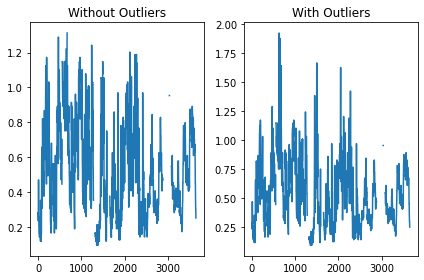

In [ ]:
plt.subplot(121)
plt.plot(data['Hs [m]'])
plt.title('Without Outliers')

plt.subplot(122)
plt.plot(data_raw['Hs [m]'])
plt.title('With Outliers')

plt.tight_layout()

### Interpolation

In [7]:
# import library
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline

In [8]:
# define other dataframe for interpolate 
data2 = copy.deepcopy(data)
data3 = copy.deepcopy(data)
data4 = copy.deepcopy(data)

In [9]:
# drop NaN value in dataframe data
data = data.dropna()

In [10]:
# cubic interpolation
y_fc=interp1d(data['Hours'],data['Hs [m]'], kind='cubic')

In [11]:
# quadratic interpolation
y_fq=interp1d(data['Hours'],data['Hs [m]'], kind='quadratic')

In [12]:
y_fc=CubicSpline(data['Hours'],data['Hs [m]'],extrapolate=True)

In [13]:

# linear interpolation
y_fl=interp1d(data['Hours'],data['Hs [m]'], kind='linear')

In [14]:
# interpolate using function we define before
import math

for i in data2['Hours'] :
  if math.isnan(data2['Hs [m]'][i-1])== True:
    data2['Hs [m]'][i-1] = y_fc(i)
    data3['Hs [m]'][i-1] = y_fq(i)
    data4['Hs [m]'][i-1] = y_fl(i)
  else:
    pass
#data.loc[data['Hs [m]'].isna()]

<ipython-input-14-86623d2f7eed>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-86623d2f7eed>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-86623d2f7eed>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



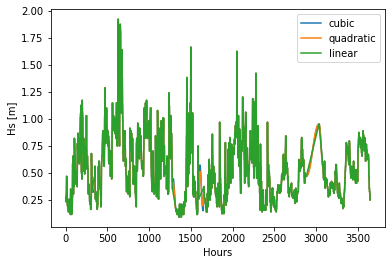

In [15]:
# plot after interpolation
plt.plot(data2['Hours'],data2['Hs [m]'], label ='cubic')
plt.plot(data3['Hours'],data3['Hs [m]'], label ='quadratic')
plt.plot(data4['Hours'],data4['Hs [m]'], label ='linear')
#plotting scatter point of data
plt.xlabel('Hours')
plt.ylabel('Hs [m]')
plt.legend()
plt.show()

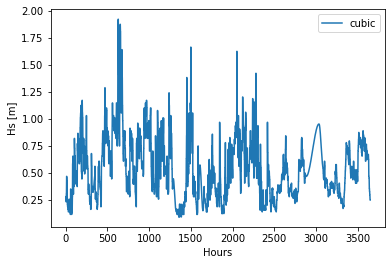

In [16]:
# plot after interpolation
plt.plot(data2['Hours'],data2['Hs [m]'], label ='cubic')
#plotting scatter point of data
plt.xlabel('Hours')
plt.ylabel('Hs [m]')
plt.legend()
plt.show()

In [28]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=data2['Date'], y=data2['Hs [m]'], name="Hs"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=data2['Date'], y=data2['Angin [m/s]'], name="Wind"),
    secondary_y=True,
)

# Add figure title
# fig.update_layout(
#     title_text="Double Y Axis Example"
# )

# Set x-axis title
fig.update_xaxes(title_text="<b>Date</b>")

# Set y-axes titles
fig.update_yaxes(title_text="<b><i>Hs</i> [m]</b> ", secondary_y=False)
fig.update_yaxes(title_text="<b>Wind [m/s]</b> ", secondary_y=True)

fig.update_layout( font_size = 14,
                    legend=dict(
                        yanchor="top",
                        y=0.99,
                        xanchor="left",
                        x=0.84,
                        font_size=10)
                    
                    ,
                    yaxis_range=[0,2.5])
fig.show()

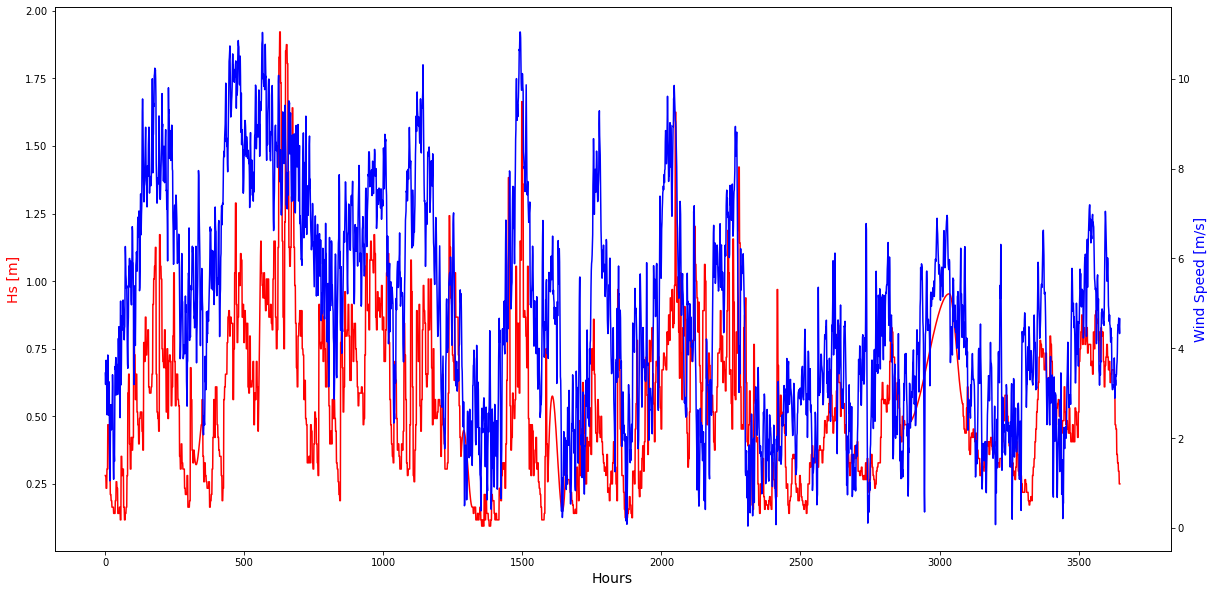

In [18]:
# plotting wind and wave
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(20, 10))
# make a plot
ax.plot(data2['Hours'],
        data2['Hs [m]'],
        color="red", 
        )
# set x-axis label
ax.set_xlabel("Hours", fontsize = 14)
# set y-axis label
ax.set_ylabel("Hs [m]",
              color="red",
              fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(data2['Hours'],
        data2['Angin [m/s]'],color="blue")
ax2.set_ylabel("Wind Speed [m/s]",color="blue",fontsize=14)
plt.show()

karena data tidak berdistribusi normal -> ada skew nya (positif) makanya buat scaling data pake -> Normalize Data

### splitting data

In [ ]:
hs = data2['Hs [m]']

In [ ]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(hs, WINDOW_SIZE)
X1.shape, y1.shape

((3643, 5, 1), (3643,))

In [ ]:
X_train1, y_train1 = X1[:round(len(X1)*0.7)], y1[:round(len(y1)*0.7)]
X_val1, y_val1 = X1[round(len(X1)*0.7):round(len(X1)*0.8)], y1[round(len(y1)*0.7):round(len(y1)*0.8)]
X_test1, y_test1 = X1[round(len(X1)*0.8):], y1[round(len(X1)*0.8):]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((2550, 5, 1), (2550,), (364, 5, 1), (364,), (729, 5, 1), (729,))

## Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(200,return_sequences=True))
model1.add(LSTM(96))
model1.add(Dense(30, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 5, 200)            161600    
                                                                 
 lstm_5 (LSTM)               (None, 96)                114048    
                                                                 
 dense_4 (Dense)             (None, 30)                2910      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 278,589
Trainable params: 278,589
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=20, callbacks=[cp1])

Epoch 1/20
79/80 [============================>.] - ETA: 0s - loss: 0.1737 - root_mean_squared_error: 0.4168

80/80 [==============================] - 18s 169ms/step - loss: 0.1725 - root_mean_squared_error: 0.4154 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0908
Epoch 2/20
80/80 [==============================] - ETA: 0s - loss: 0.0274 - root_mean_squared_error: 0.1656

80/80 [==============================] - 12s 148ms/step - loss: 0.0274 - root_mean_squared_error: 0.1656 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0683
Epoch 3/20
79/80 [============================>.] - ETA: 0s - loss: 0.0263 - root_mean_squared_error: 0.1622

80/80 [==============================] - 15s 186ms/step - loss: 0.0264 - root_mean_squared_error: 0.1624 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0614
Epoch 4/20
79/80 [============================>.] - ETA: 0s - loss: 0.0261 - root_mean_squared_error: 0.1615

80/80 [==============================] - 13s 169ms/step - loss: 0.0260 - root_mean_squared_error: 0.1611 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0591
Epoch 5/20
79/80 [============================>.] - ETA: 0s - loss: 0.0254 - root_mean_squared_error: 0.1595

80/80 [==============================] - 14s 178ms/step - loss: 0.0254 - root_mean_squared_error: 0.1594 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0580
Epoch 6/20
80/80 [==============================] - 3s 35ms/step - loss: 0.0249 - root_mean_squared_error: 0.1578 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0613
Epoch 7/20
79/80 [============================>.] - ETA: 0s - loss: 0.0245 - root_mean_squared_error: 0.1566

80/80 [==============================] - 15s 184ms/step - loss: 0.0245 - root_mean_squared_error: 0.1565 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0565
Epoch 8/20
79/80 [============================>.] - ETA: 0s - loss: 0.0239 - root_mean_squared_error: 0.1547

80/80 [==============================] - 14s 174ms/step - loss: 0.0239 - root_mean_squared_error: 0.1547 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0560
Epoch 9/20
80/80 [==============================] - 3s 33ms/step - loss: 0.0232 - root_mean_squared_error: 0.1523 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0562
Epoch 10/20
79/80 [============================>.] - ETA: 0s - loss: 0.0227 - root_mean_squared_error: 0.1505

80/80 [==============================] - 13s 169ms/step - loss: 0.0226 - root_mean_squared_error: 0.1502 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0537
Epoch 11/20
80/80 [==============================] - 3s 35ms/step - loss: 0.0217 - root_mean_squared_error: 0.1474 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0566
Epoch 12/20
80/80 [==============================] - 3s 33ms/step - loss: 0.0208 - root_mean_squared_error: 0.1444 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0565
Epoch 13/20
79/80 [============================>.] - ETA: 0s - loss: 0.0197 - root_mean_squared_error: 0.1405

80/80 [==============================] - 24s 299ms/step - loss: 0.0197 - root_mean_squared_error: 0.1403 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0499
Epoch 14/20
78/80 [============================>.] - ETA: 0s - loss: 0.0184 - root_mean_squared_error: 0.1356

80/80 [==============================] - 14s 176ms/step - loss: 0.0183 - root_mean_squared_error: 0.1354 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0481
Epoch 15/20
79/80 [============================>.] - ETA: 0s - loss: 0.0171 - root_mean_squared_error: 0.1308

80/80 [==============================] - 15s 191ms/step - loss: 0.0172 - root_mean_squared_error: 0.1312 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0467
Epoch 16/20
80/80 [==============================] - 3s 33ms/step - loss: 0.0160 - root_mean_squared_error: 0.1264 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0506
Epoch 17/20
80/80 [==============================] - 3s 34ms/step - loss: 0.0151 - root_mean_squared_error: 0.1230 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0471
Epoch 18/20
80/80 [==============================] - 3s 33ms/step - loss: 0.0144 - root_mean_squared_error: 0.1199 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0476
Epoch 19/20
79/80 [============================>.] - ETA: 0s - loss: 0.0140 - root_mean_squared_error: 0.1184

80/80 [==============================] - 15s 187ms/step - loss: 0.0140 - root_mean_squared_error: 0.1181 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0431
Epoch 20/20
80/80 [==============================] - 5s 62ms/step - loss: 0.0138 - root_mean_squared_error: 0.1175 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0450


In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [ ]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Univariate':train_predictions, 'Actuals':y_train1})
train_results

80/80 [==============================] - 2s 9ms/step


,Univariate,Actuals
0,0.255712,0.234
1,0.244458,0.305
2,0.257627,0.305
3,0.280341,0.305
4,0.297841,0.469
...,...,...
2545,0.328004,0.328
2546,0.326265,0.328
2547,0.326635,0.328
2548,0.326635,0.344


In [ ]:
train_results['Date'] = data2['Date'].iloc[:round(len(X1)*0.7)]
train_results.head()

,Univariate,Actuals,Date
0,0.255712,0.234,1999-01-12 00:00:00
1,0.244458,0.305,1999-01-12 01:00:00
2,0.257627,0.305,1999-01-12 02:00:00
3,0.280341,0.305,1999-01-12 03:00:00
4,0.297841,0.469,1999-01-12 04:00:00


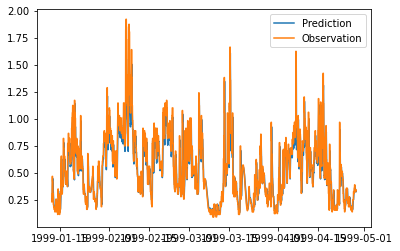

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Date'],train_results['Univariate'], label ='Prediction')
plt.plot(train_results['Date'],train_results['Actuals'], label='Observation')
plt.legend(loc='best')

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure()
fig.add_trace(go.Scatter(x=train_results['Date'], y=train_results['Univariate'],
                    mode='lines',
                    name='Fitting Data Training'))
fig.add_trace(go.Scatter(x=train_results['Date'], y=train_results['Actuals'],
                    mode='lines',
                    name='Observation'))

# Edit the layout
fig.update_layout( xaxis_title='<b>Date</b>',
                   yaxis_title='<b><i>Hs</i> [m]</b>')


In [ ]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Univariate':val_predictions, 'Actuals':y_val1})
val_results.head()

12/12 [==============================] - 0s 11ms/step


,Univariate,Actuals
0,0.336233,0.344
1,0.340121,0.359
2,0.346078,0.359
3,0.350557,0.359
4,0.354199,0.344


In [ ]:
val_results['Date'] = data2['Date'].iloc[round(len(X1)*0.7):round(len(X1)*0.8)].values
val_results.head()

,Univariate,Actuals,Date
0,0.336233,0.344,1999-04-28 06:00:00
1,0.340121,0.359,1999-04-28 07:00:00
2,0.346078,0.359,1999-04-28 08:00:00
3,0.350557,0.359,1999-04-28 09:00:00
4,0.354199,0.344,1999-04-28 10:00:00


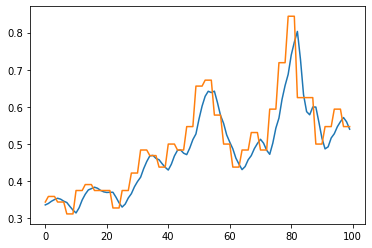

In [ ]:
plt.plot(val_results['Univariate'][:100])
plt.plot(val_results['Actuals'][:100])

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure()
fig.add_trace(go.Scatter(x=val_results['Date'], y=val_results['Univariate'],
                    mode='lines',
                    name='Fitting Data Validation'))
fig.add_trace(go.Scatter(x=val_results['Date'], y=val_results['Actuals'],
                    mode='lines',
                    name='Observation'))

# Edit the layout
fig.update_layout( xaxis_title='<b>Date</b>',
                   yaxis_title='<b><i>Hs</i> [m]</b>')


In [ ]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Univariate':test_predictions, 'Actuals':y_test1})
test_results.head()

23/23 [==============================] - 0s 10ms/step


,Univariate,Actuals
0,0.518838,0.542711
1,0.522030,0.546308
2,0.525281,0.549968
3,0.528590,0.553689
4,0.531955,0.557470


In [ ]:
test_results['Date'] = data2['Date'].iloc[round(len(X1)*0.8):round(len(X1))].values
test_results.head()

,Univariate,Actuals,Date
0,0.518838,0.542711,1999-05-13 10:00:00
1,0.522030,0.546308,1999-05-13 11:00:00
2,0.525281,0.549968,1999-05-13 12:00:00
3,0.528590,0.553689,1999-05-13 13:00:00
4,0.531955,0.557470,1999-05-13 14:00:00


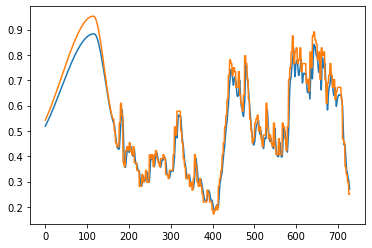

In [ ]:
plt.plot(test_results['Univariate'])
plt.plot(test_results['Actuals'])

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure()
fig.add_trace(go.Scatter(x=test_results['Date'], y=test_results['Univariate'],
                    mode='lines',
                    name='Fitting Data Testing'))
fig.add_trace(go.Scatter(x=test_results['Date'], y=test_results['Actuals'],
                    mode='lines',
                    name='Observation'))

# Edit the layout
fig.update_layout( xaxis_title='<b>Date</b>',
                   yaxis_title='<b><i>Hs</i> [m]</b>')


In [ ]:
from sklearn.metrics import mean_squared_error
import math

MSE = mean_squared_error(test_results['Actuals'],test_results['Univariate'])
RMSE = math.sqrt(MSE)
RMSE

0.04664250290947607

### verif


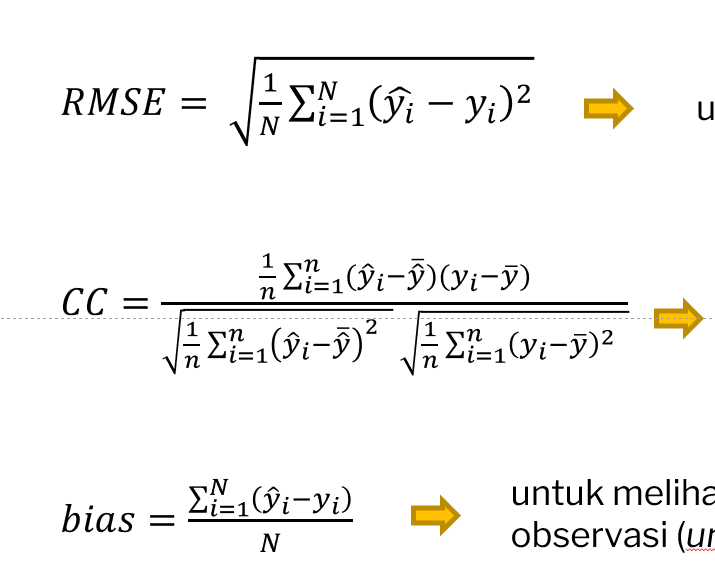

In [ ]:
# coefficiect correlation 
mean_pred = test_results['Univariate'].mean()
mean_obv = test_results['Actuals'].mean()
atas = 0
a_sum = 0
b_sum = 0
for i in range(len(test_results['Actuals'])):
  a = test_results['Univariate'][i] - mean_pred
  b = test_results['Actuals'][i] - mean_obv
  c = a*b
  atas +=c
  a_sqr = a**2
  b_sqr = b**2
  a_sum += a_sqr
  b_sum += b_sqr
 
print(atas, a_sum, b_sum)
konst = 1/len(test_results['Actuals'])
cc = konst* atas / ((konst*a_sum)**0.5) * ((konst*b_sum)**0.5)
cc

28.093795611560637 25.574883155944548 31.839152862595576


0.04299884728006965

In [ ]:
from sklearn.metrics import mean_squared_error
import math

MSE = mean_squared_error(test_results['Actuals'],test_results['Univariate'])
RMSE = math.sqrt(MSE)
RMSE

0.04664250290947607

In [ ]:
konst

0.0013717421124828531

In [ ]:

from scipy.stats import pearsonr
corr, _ = pearsonr(test_results['Actuals'],test_results['Univariate'])
corr

0.984516133397208

In [ ]:
# bias 
gap_sum = 0
for j in range(len(test_results['Actuals'])):
  gap = test_results['Univariate'][j] - test_results['Actuals'][j]
  gap_sum += gap

bias = gap_sum/len(test_results['Actuals'])
bias

-0.022207140890202863

In [ ]:
train_results.to_csv('/content/drive/MyDrive/TA (1)/Learn to Code ML/Hasil Prediksi /univariate_train_lstm_karawang.csv')
val_results.to_csv('/content/drive/MyDrive/TA (1)/Learn to Code ML/Hasil Prediksi /univariate_val_lstm_karawang.csv')
test_results.to_csv('/content/drive/MyDrive/TA (1)/Learn to Code ML/Hasil Prediksi /univariate_test_lstm_karawangn.csv')